In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
import os
import pandas as pd
import numpy as np
import warnings
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
warnings.filterwarnings('ignore')

In [104]:
print(sys.executable)

C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [54]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from helpers import *
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
# para ver la totalidad del archivo a leer
pd.set_option('display.max_columns', None)

In [56]:
folder = r"C:\Users\Admin\Downloads\Colsubsidio\Prueba_Científico"
print(os.listdir(folder))

['Colsubsidio.png', 'Data_Scientist_Test_2023.html', 'diccionario_datos.xlsx', 'Matrix.png', 'test.csv', 'train.csv', 'train_test_demograficas.xlsx', 'train_test_subsidios.xlsx', '~$diccionario_datos.xlsx']


In [ ]:
df1 = pd.read_csv(r"C:\Users\Admin\Downloads\Colsubsidio\Prueba_Científico\train.csv", encoding="latin1", sep=";")
df2 = pd.read_excel(r"C:\Users\Admin\Downloads\Colsubsidio\Prueba_Científico\train_test_demograficas.xlsx")
df3 = pd.read_excel(r"C:\Users\Admin\Downloads\Colsubsidio\Prueba_Científico\train_test_subsidios.xlsx")

In [58]:
df1.head()

,id,Fecha.Expedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,Fecha.Proceso,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo
0,1,4/11/2006,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,1 050 000.00,1 050 000.00,0,0,0,0,0,2 625 000.00,0,0,0,0,0
1,2,17/08/2007,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,1 180 000.00,1 180 000.00,0,0,0,0,0,2 950 000.00,0,0,0,0,0
2,3,8/05/2008,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,150 000.00,150 000.00,0,0,0,0,0,500 000.00,0,0,0,0,0
3,4,21/12/2006,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,680 000.00,680 000.00,0,0,0,0,0,1 700 000.00,0,0,0,0,0
4,5,13/09/2007,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,3 307 500.00,3 307 500.00,0,0,0,0,0,6 615 000.00,0,0,0,0,0


In [59]:
df2.head()

,id,categoria,segmento,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,estrato
0,1,B,Segmento_Medio,31,tecnico_tecnologico,soltero,F,1,4,NaN
1,2,C,Segmento_Medio,38,tecnico_tecnologico,soltero,M,1,1,NaN
2,3,A,Segemnto_Basico,42,primaria,soltero,M,3,3,NaN
3,4,B,Segmento_Medio,60,tecnico_tecnologico,soltero,M,1,4,NaN
4,5,C,Segmento_Alto,27,tecnico_tecnologico,separado,M,1,1,NaN


In [60]:
df3.head()

,id,cuota_monetaria,sub_vivenda,bono_lonchera
0,1,0,0,0
1,2,0,0,0
2,3,1,0,1
3,4,0,0,0
4,5,0,0,0


* Dado que se indica que Id es una identificacion unica por cliente entonces uniremos estos df por ese id


In [61]:
print(df1.shape, df2.shape, df3.shape)

(50001, 22) (55002, 10) (55002, 4)


In [62]:
df4=df1.merge(df2, on='id', how='inner').merge(df3, on='id', how='inner')
print(df4.shape)
del df1, df2, df3
gc.collect()

(50001, 34)


55134

In [63]:
# Asegurar que ambas columnas estén en formato datetime
df4['Fecha.Proceso'] = pd.to_datetime(df4['Fecha.Proceso'], format="%d/%m/%Y", errors="coerce")
df4['Fecha.Expedicion'] = pd.to_datetime(df4['Fecha.Expedicion'], format="%d/%m/%Y", errors="coerce")
# df4['Retencion'] = df4['Retencion'].str.lower()
# df4['Cancelacion'] = df4['Cancelacion'].str.lower()

In [ ]:

def limpiar_texto(texto):
    if pd.isna(texto):
        return texto
    # pasar a minúsculas
    texto = texto.lower().strip()
    # quitar acentos/tildes
    texto = ''.join(
        c for c in unicodedata.normalize('NFKD', texto)
        if not unicodedata.combining(c)
    )
    return texto

df4['Retencion'] = df4['Retencion'].apply(limpiar_texto)
df4['Cancelacion'] = df4['Cancelacion'].apply(limpiar_texto)
df4['nivel_educativo'] = df4['nivel_educativo'].apply(limpiar_texto)
df4['estado_civil'] = df4['estado_civil'].apply(limpiar_texto)

In [65]:
# Lista de columnas a convertir
cols_convertir = [
    "Disponible.Avances",
    "Limite.Avances",
    "Total.Intereses",
    "Saldos.Mes.Ant",
    "Pagos.Mes.Ant",
    "Vtas.Mes.Ant",
    "Limite.Cupo",
    "Pago.del.Mes",
    "Pago.Minimo",
    "Vr.Mora",
    "Vr.Cuota.Manejo",
    "Saldo"
]

# Limpiar y convertir a float
for col in cols_convertir:
    df4[col] = (
        df4[col]
        .astype(str)                       # aseguramos string
        .str.replace(r"[^0-9\-,.]", "", regex=True)  # quitar símbolos raros
        .str.replace(",", ".", regex=False)          # estandarizar decimales
        .astype(float)                     # convertir a float
    )

In [66]:
# Lista de columnas a convertir a entero
cols_int = ["cuota_monetaria", "sub_vivenda", "bono_lonchera", "PAC", "contrato", "edad"]

for col in cols_int:
    df4[col] = (
        df4[col]
        .astype(str)                               # convertir a string
        .str.replace(r"[^0-9-]", "", regex=True)   # quitar todo lo que no sea número o signo negativo
        .replace("", "0")                          # si queda vacío, poner 0
        .astype(int)                               # convertir a entero
    )


In [67]:
# Filtrar los casos donde Fecha.Proceso < Fecha.Expedicion
condicion = df4['Fecha.Proceso'] < df4['Fecha.Expedicion']
resultado = df4[condicion]
resultado

,id,Fecha.Expedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,Fecha.Proceso,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo,categoria,segmento,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,estrato,cuota_monetaria,sub_vivenda,bono_lonchera


In [69]:
df4.Target.value_counts()

Target
0    48589
1     1412
Name: count, dtype: int64

In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50001 non-null  int64         
 1   Fecha.Expedicion    50001 non-null  datetime64[ns]
 2   Cancelacion         1412 non-null   object        
 3   Gestionable         1412 non-null   object        
 4   Retencion           1412 non-null   object        
 5   TIPO                1412 non-null   object        
 6   ANO_MES             1412 non-null   float64       
 7   Target              50001 non-null  int64         
 8   Fecha.Proceso       50001 non-null  datetime64[ns]
 9   Disponible.Avances  50001 non-null  float64       
 10  Limite.Avances      50001 non-null  float64       
 11  Total.Intereses     50001 non-null  float64       
 12  Saldos.Mes.Ant      50001 non-null  float64       
 13  Pagos.Mes.Ant       50001 non-null  float64   

In [72]:
df4.isnull().sum().sort_values(ascending=False)/len(df4)

Gestionable          0.97
Cancelacion          0.97
ANO_MES              0.97
TIPO                 0.97
Retencion            0.97
estrato              0.92
Fecha.Expedicion     0.00
id                   0.00
Fecha.Proceso        0.00
Target               0.00
Limite.Avances       0.00
Total.Intereses      0.00
Saldos.Mes.Ant       0.00
Pagos.Mes.Ant        0.00
Vtas.Mes.Ant         0.00
Edad.Mora            0.00
Limite.Cupo          0.00
Disponible.Avances   0.00
Pago.del.Mes         0.00
Pago.Minimo          0.00
Vr.Cuota.Manejo      0.00
Vr.Mora              0.00
categoria            0.00
segmento             0.00
edad                 0.00
Saldo                0.00
nivel_educativo      0.00
estado_civil         0.00
PAC                  0.00
Genero               0.00
contrato             0.00
cuota_monetaria      0.00
sub_vivenda          0.00
bono_lonchera        0.00
dtype: float64

In [73]:
df4.Cancelacion.value_counts()

Cancelacion
capacidad de endeudamiento para pago a otro credito ( hipotecario)         284
cuota de manejo                                                            271
amparada-no desea recibir el cupo                                          152
inconformidad del producto                                                 140
no lo utiliza                                                              110
retiro de la caja/ empresa                                                  75
no desea tener mas creditos                                                 68
se va del pais/ciudad donde no tenemos presencia colsubsidio                48
no necesita el producto                                                     45
capacidad de  pago                                                          21
se va del pais                                                              21
capacidad de endeudamiento para pago a otro credito ( hipotecario )         19
inconformidad con el cobro de seguros   

In [74]:
df4.Retencion.value_counts()

Retencion
no efectiva    1239
efectiva        173
Name: count, dtype: int64

In [75]:
df4.Target.value_counts()

Target
0    48589
1     1412
Name: count, dtype: int64

In [76]:
df4.TIPO.value_counts()

TIPO
CUPO      1106
AMPARO     306
Name: count, dtype: int64

In [77]:
df4.Genero.value_counts()/len(df4)

Genero
M   0.50
F   0.50
Name: count, dtype: float64

In [78]:
##Fechas maximas y minismas de cancelacion
df4[df4['Target']==1]['Fecha.Proceso'].min(), df4[df4['Target']==1]['Fecha.Proceso'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-03-01 00:00:00'))

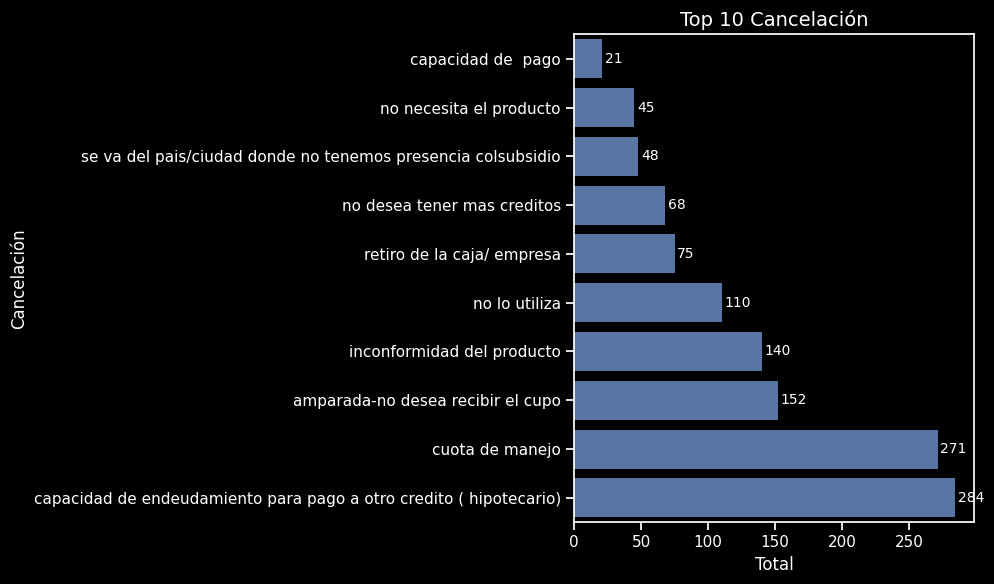

In [79]:
## Veremos el tipo de cancelacion mas comun
# Contar valores y quedarnos con el top 10
conteo = df4['Cancelacion'].value_counts().reset_index()
conteo.columns = ['Cancelacion', 'Total']
conteo = conteo.sort_values('Total', ascending=False).head(10)

# Crear gráfica horizontal
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=conteo,
    y='Cancelacion',
    x='Total',
    order=conteo.sort_values('Total', ascending=True)['Cancelacion']  # invertimos para que el mayor quede arriba
)

# Añadir los totales al final de cada barra
for i, valor in enumerate(conteo.sort_values('Total', ascending=True)['Total']):
    ax.text(valor + 2, i, str(valor), va='center', fontsize=10)

plt.title("Top 10 Cancelación", fontsize=14)
plt.xlabel("Total")
plt.ylabel("Cancelación")
plt.tight_layout()
plt.show()


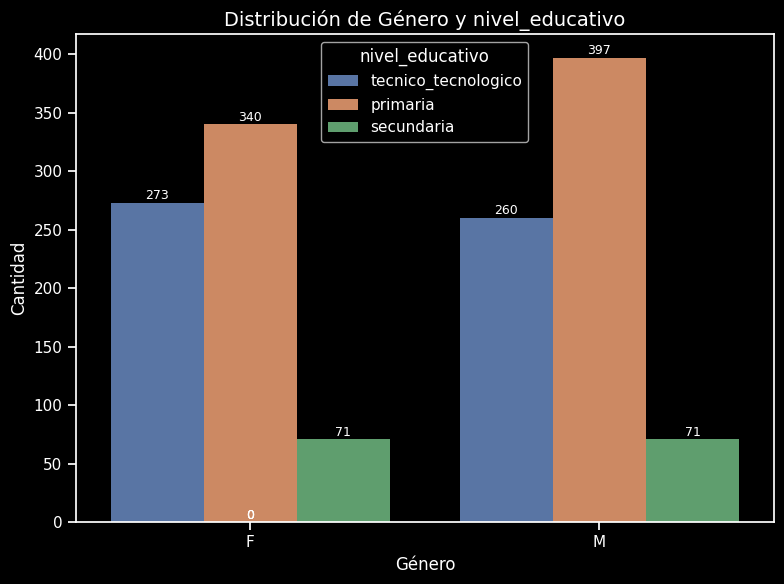

In [80]:
## Se quiere ver la distribucion de las personas que se fueron cual era su nivel educativo y tipo de genero

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df4[df4['Target']==1],
    x="Genero",         # columna del género
    hue="nivel_educativo"        # columna del target
)

# Añadir totales encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.5,
        int(height),
        ha="center", va="bottom", fontsize=9
    )

plt.title("Distribución de Género y nivel_educativo", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="nivel_educativo")
plt.tight_layout()
plt.show()


In [81]:
print(df4[df4['Target']==1]['edad'].describe())
print(df4[df4['Target']==0]['edad'].describe())

count   1,412.00
mean       41.49
std        14.16
min        18.00
25%        29.00
50%        41.00
75%        54.00
max        65.00
Name: edad, dtype: float64
count   48,589.00
mean        41.45
std         13.86
min         18.00
25%         30.00
50%         41.00
75%         53.00
max         65.00
Name: edad, dtype: float64


In [82]:
print(df4[df4['Target']==1]['PAC'].describe())
print(df4[df4['Target']==0]['PAC'].describe())

count   1,412.00
mean        2.14
std         0.94
min         1.00
25%         1.00
50%         3.00
75%         3.00
max         3.00
Name: PAC, dtype: float64
count   48,589.00
mean         2.16
std          0.93
min          0.00
25%          1.00
50%          3.00
75%          3.00
max          3.00
Name: PAC, dtype: float64


In [83]:
df4.sub_vivenda.value_counts()/len(df4)

sub_vivenda
0   1.00
1   0.00
Name: count, dtype: float64

In [84]:
df4.bono_lonchera.value_counts()/len(df4)

bono_lonchera
1   0.63
0   0.37
Name: count, dtype: float64

In [85]:
print(df4[df4['Target']==1]['segmento'].value_counts())
print(df4[df4['Target']==0]['segmento'].value_counts())

segmento
Segemnto_Basico    672
Segmento_Medio     613
Segmento_Joven      93
Segmento_Alto       34
Name: count, dtype: int64
segmento
Segemnto_Basico    22632
Segmento_Medio     21764
Segmento_Joven      3193
Segmento_Alto       1000
Name: count, dtype: int64


In [86]:
# Función para capturar los tipos de variables
continuous, categoricals, discretes, temporaries = capture_variables(data=df4.loc[:, df4.columns != 'Target']) # type: ignore

		Tipos de variables
Hay 16 variables continuas
Hay 6 variables discretas
Hay 2 variables temporales
Hay 9 variables categóricas


In [87]:
## debemos eliminar estas variables que no aportan nada al modelo
df4.drop(columns=['ANO_MES', 'estrato','sub_vivenda','Cancelacion','TIPO','Retencion','Gestionable','Cancelacion'], inplace=True)

In [88]:
df4.head()

,id,Fecha.Expedicion,Target,Fecha.Proceso,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo,categoria,segmento,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,cuota_monetaria,bono_lonchera
0,1,2006-11-04,0,2018-04-01,"1,050,000.00","1,050,000.00",0.00,0.00,0.00,0.00,0,"2,625,000.00",0.00,0.00,0.00,0.00,0.00,B,Segmento_Medio,31,tecnico_tecnologico,soltero,F,1,4,0,0
1,2,2007-08-17,0,2018-04-01,"1,180,000.00","1,180,000.00",0.00,0.00,0.00,0.00,0,"2,950,000.00",0.00,0.00,0.00,0.00,0.00,C,Segmento_Medio,38,tecnico_tecnologico,soltero,M,1,1,0,0
2,3,2008-05-08,0,2018-04-01,"150,000.00","150,000.00",0.00,0.00,0.00,0.00,0,"500,000.00",0.00,0.00,0.00,0.00,0.00,A,Segemnto_Basico,42,primaria,soltero,M,3,3,1,1
3,4,2006-12-21,0,2018-04-01,"680,000.00","680,000.00",0.00,0.00,0.00,0.00,0,"1,700,000.00",0.00,0.00,0.00,0.00,0.00,B,Segmento_Medio,60,tecnico_tecnologico,soltero,M,1,4,0,0
4,5,2007-09-13,0,2018-04-01,"3,307,500.00","3,307,500.00",0.00,0.00,0.00,0.00,0,"6,615,000.00",0.00,0.00,0.00,0.00,0.00,C,Segmento_Alto,27,tecnico_tecnologico,separado,M,1,1,0,0


In [89]:
# Nombre del día en español
df4['Dia_Semana'] = df4['Fecha.Proceso'].dt.day_name(locale='es_ES')
# Número de día (0=Lunes, 6=Domingo)
df4['Num_Dia_Semana'] = df4['Fecha.Proceso'].dt.weekday

In [90]:
# 2) Máscara de filas válidas
df5=df4[df4['Target']==1]
mask = df5['Fecha.Proceso'].notna() & df5['Fecha.Expedicion'].notna()

# 3) Meses de calendario transcurridos (ignora días)
meses_cal = (
    (df5['Fecha.Proceso'].dt.year  * 12 + df5['Fecha.Proceso'].dt.month)
  - (df5['Fecha.Expedicion'].dt.year * 12 + df5['Fecha.Expedicion'].dt.month)
)

# 4) Asigna con soporte nulo (Int64 = entero con NA)
df5['Meses_Diferencia'] = meses_cal.where(mask, pd.NA).astype('Int64')

# 5) Resumen (min, max, mean, mediana y cuartiles) ignorando NA
resumen = df5['Meses_Diferencia'].agg(
    minimo='min',
    maximo='max',
    promedio='mean',
    mediana='median',
    q1=lambda s: s.quantile(0.25),
    q3=lambda s: s.quantile(0.75),
).round(2)

print(resumen)

minimo       0.00
maximo     134.00
promedio    27.66
mediana     16.00
q1           8.00
q3          39.00
Name: Meses_Diferencia, dtype: float64


In [91]:
df5[['Fecha.Expedicion', 'Fecha.Proceso','Meses_Diferencia']][df5['Meses_Diferencia']<1]

,Fecha.Expedicion,Fecha.Proceso,Meses_Diferencia
38247,2017-12-17,2017-12-31,0
49797,2017-12-20,2017-12-31,0


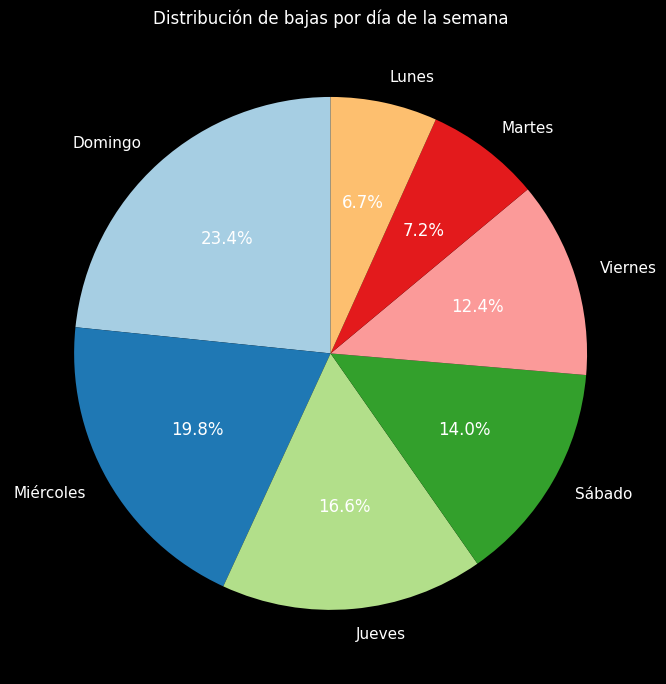

In [97]:
import matplotlib.pyplot as plt

# ==========================
# 1) Gráfica de torta (pie) para Dia_Semana
# ==========================
dias_counts = df5['Dia_Semana'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    dias_counts,
    labels=dias_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Distribución de bajas por día de la semana")
plt.tight_layout()
plt.show()


In [100]:
# Extraer año-mes
df5['Anio_Mes'] = df5['Fecha.Proceso'].dt.to_period('M')

# Contar bajas por mes
bajas_por_mes = df5['Anio_Mes'].value_counts().sort_index()

print("Bajas por mes:")
print(bajas_por_mes)

# Mes con más bajas
mes_max_bajas = bajas_por_mes.idxmax()
num_max_bajas = bajas_por_mes.max()

print(f"\nEl mes con más bajas fue {mes_max_bajas} con {num_max_bajas} registros.")

Bajas por mes:
Anio_Mes
2017-01    157
2017-02     98
2017-03     89
2017-04     81
2017-05     95
2017-06     86
2017-07    116
2017-08    102
2017-09     83
2017-10     84
2017-11     92
2017-12    181
2018-02     71
2018-03     77
Freq: M, Name: count, dtype: int64

El mes con más bajas fue 2017-12 con 181 registros.


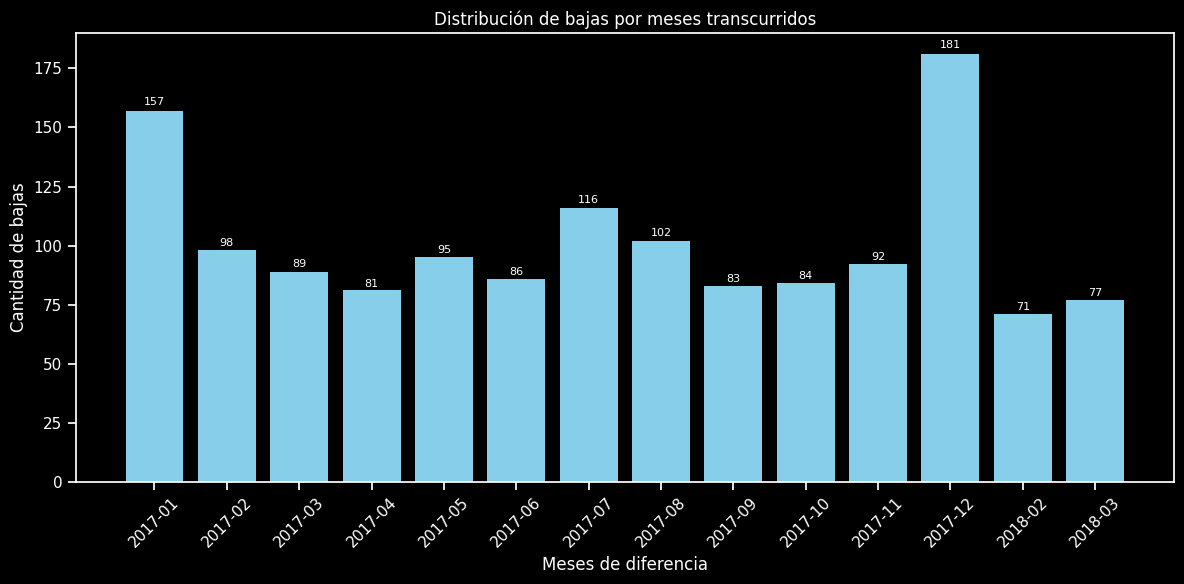

In [101]:
# ==========================
# 2) Gráfica de barras para Meses_Diferencia
# ==========================
meses_counts = df5['Anio_Mes'].value_counts().sort_index()

plt.figure(figsize=(12,6))
bars = plt.bar(meses_counts.index.astype(str), meses_counts.values, color='skyblue')

plt.title("Distribución de bajas por meses transcurridos")
plt.xlabel("Meses de diferencia")
plt.ylabel("Cantidad de bajas")
plt.xticks(rotation=45)

# Etiquetas encima de cada barra
for i, value in enumerate(meses_counts.values):
    plt.text(i, value + (value*0.01), str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


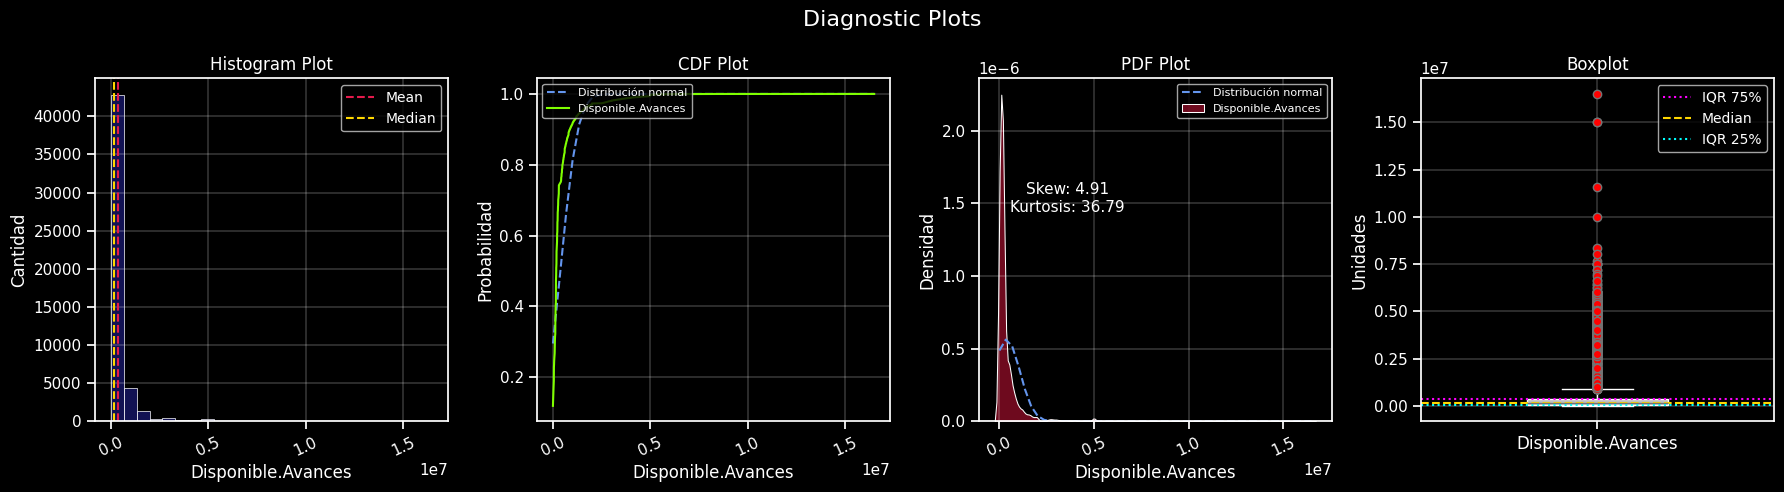

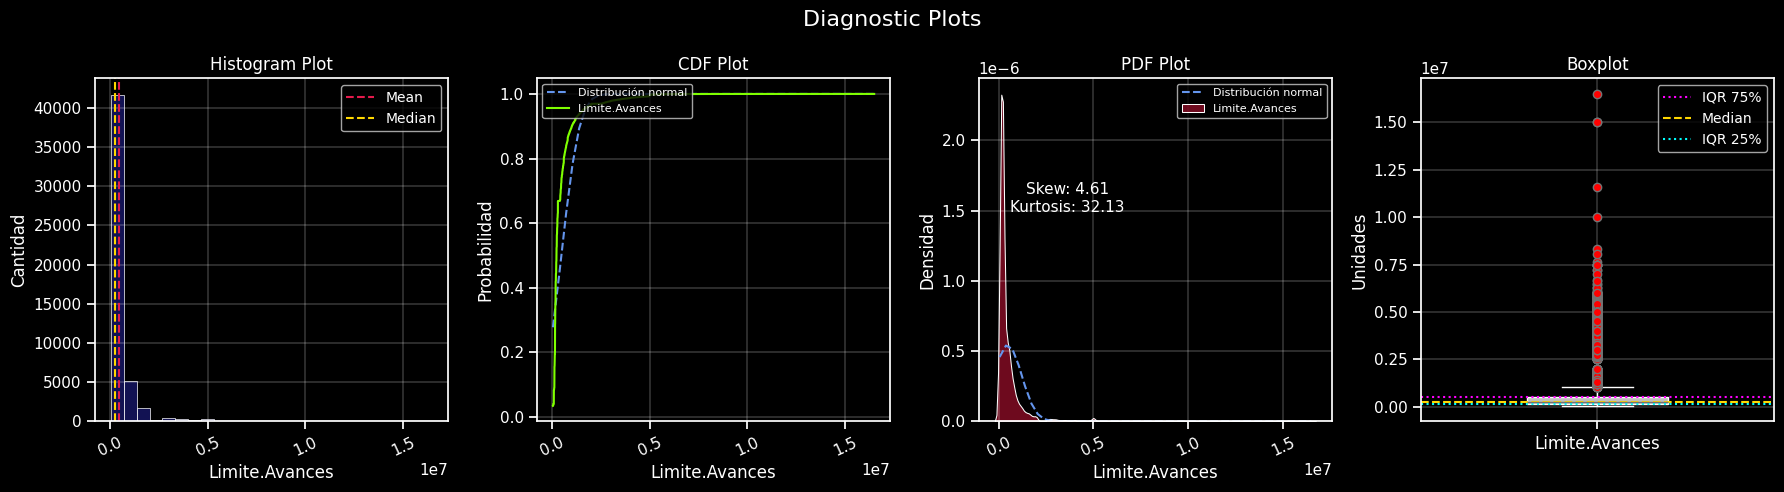

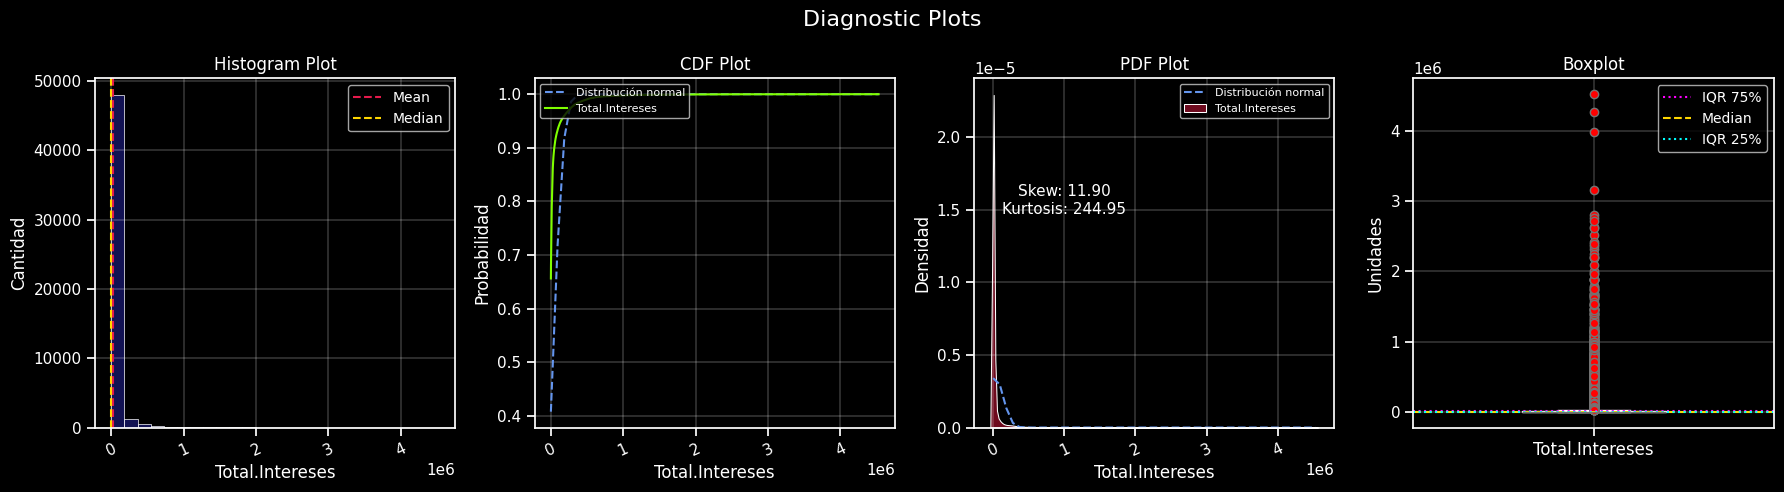

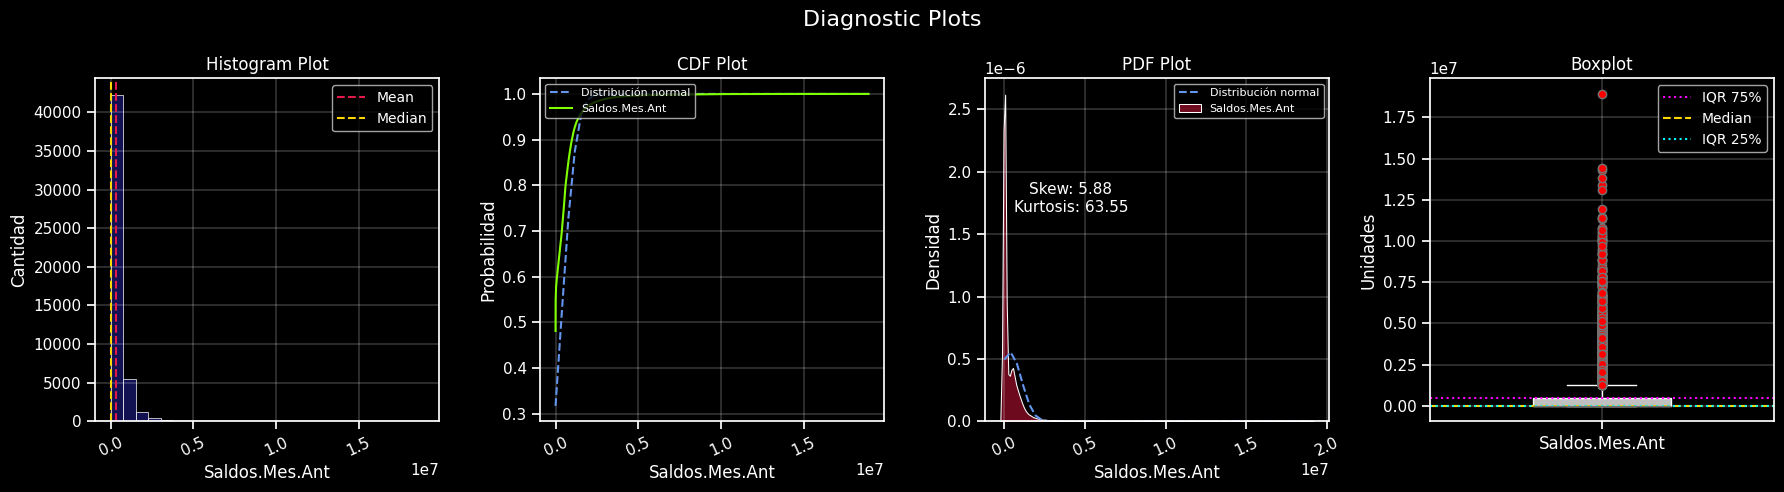

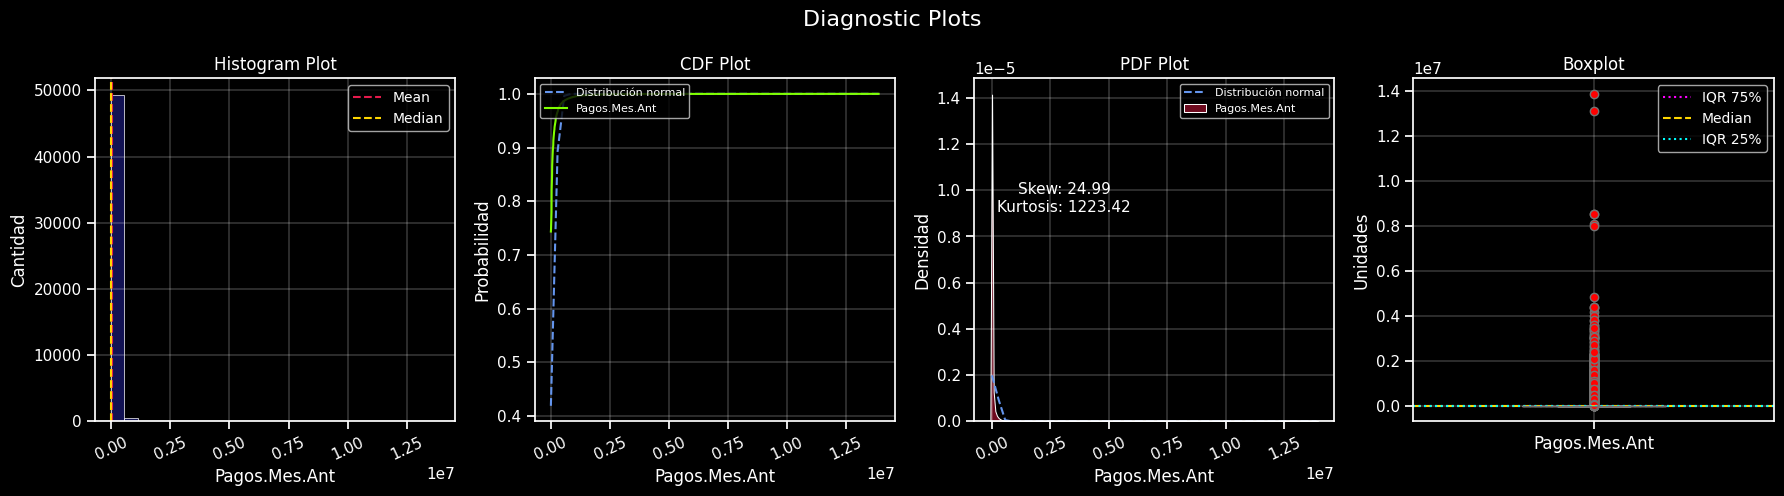

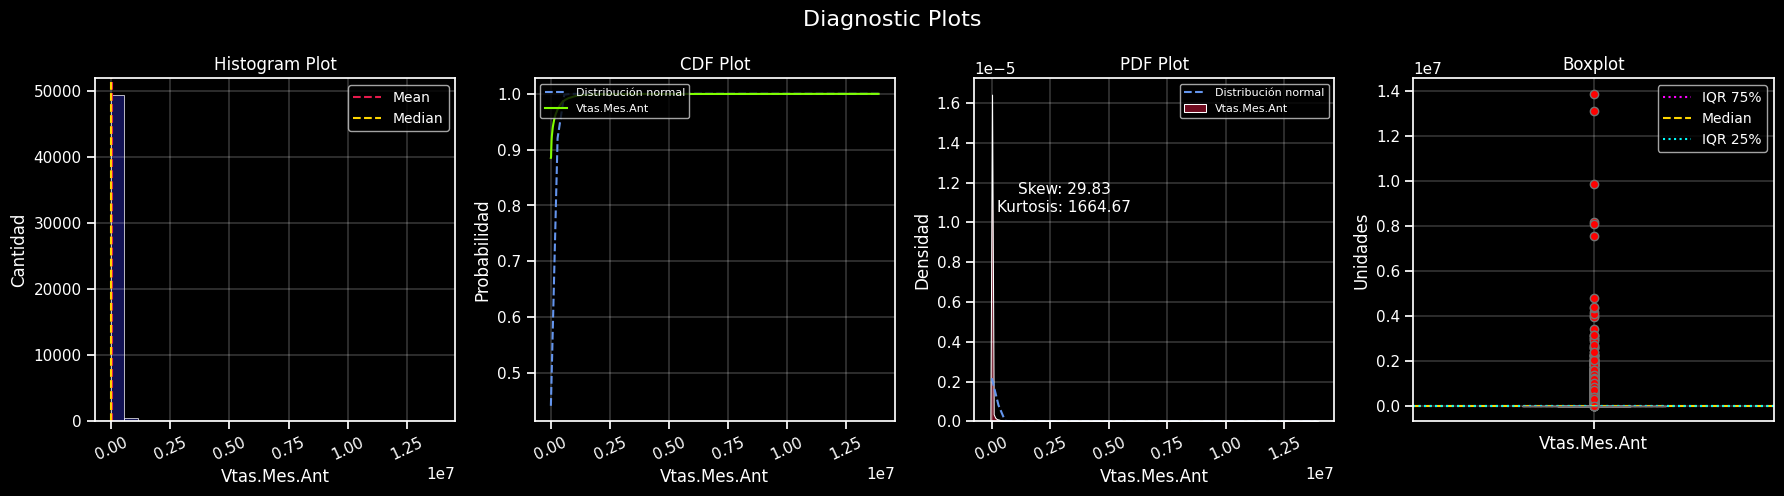

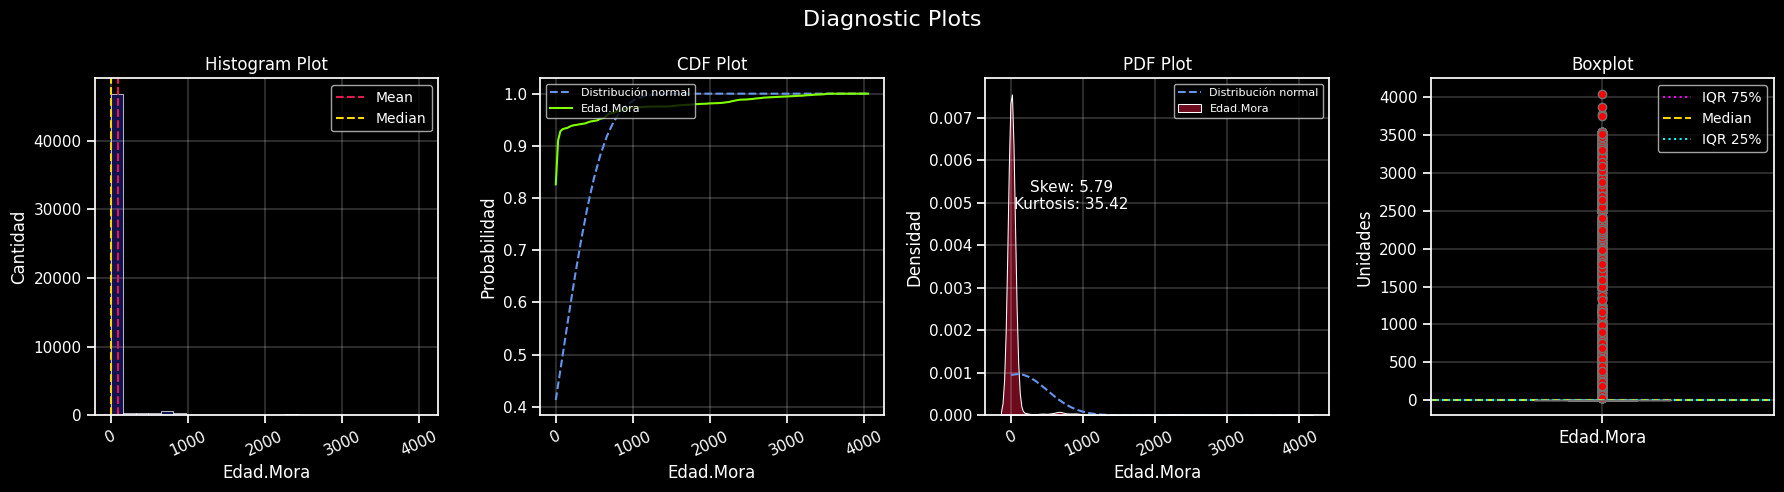

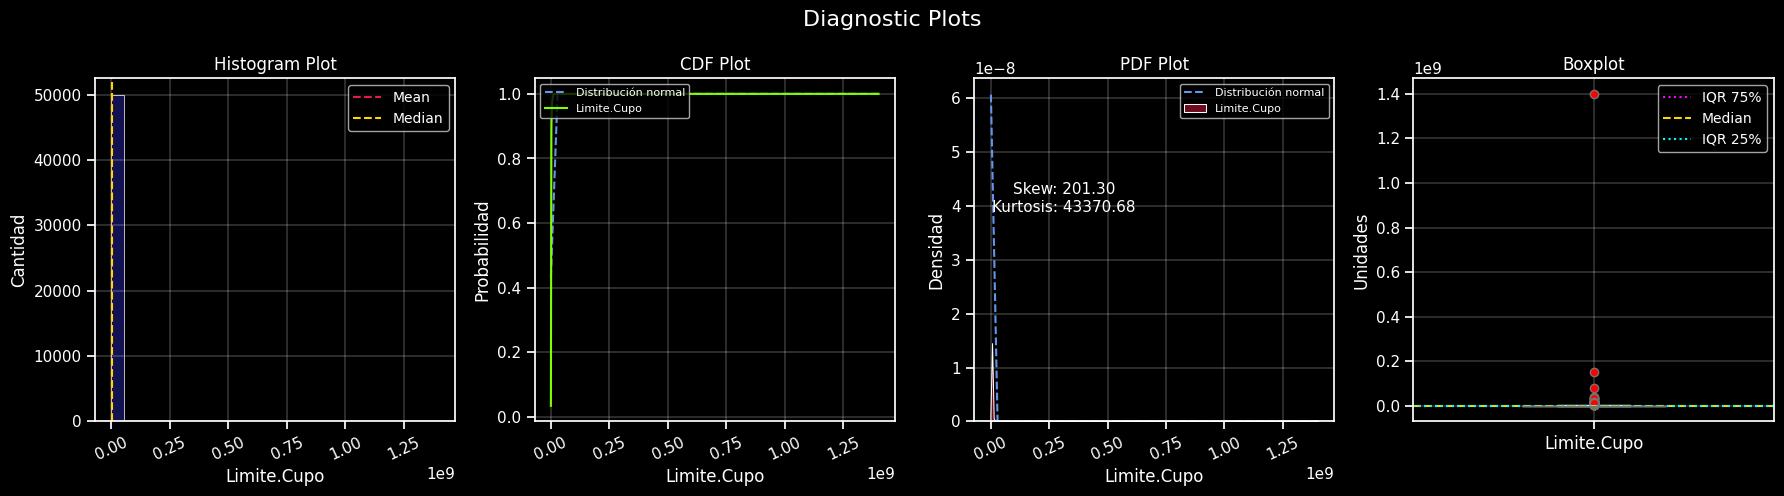

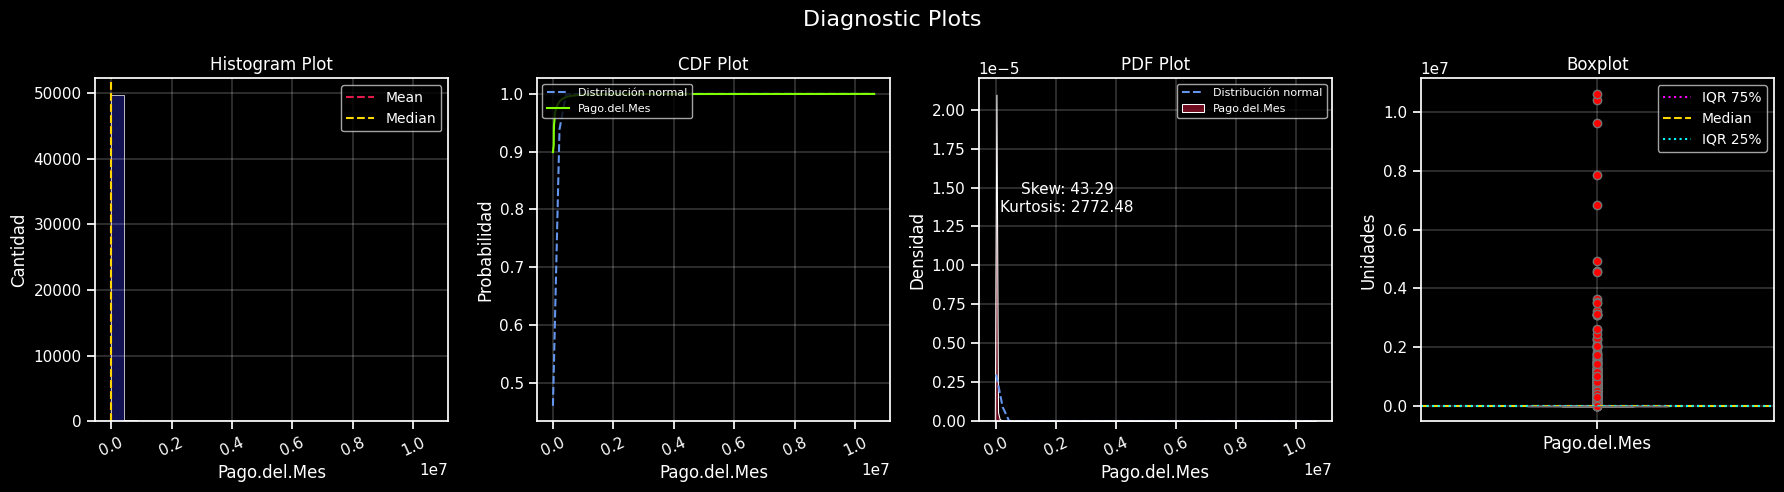

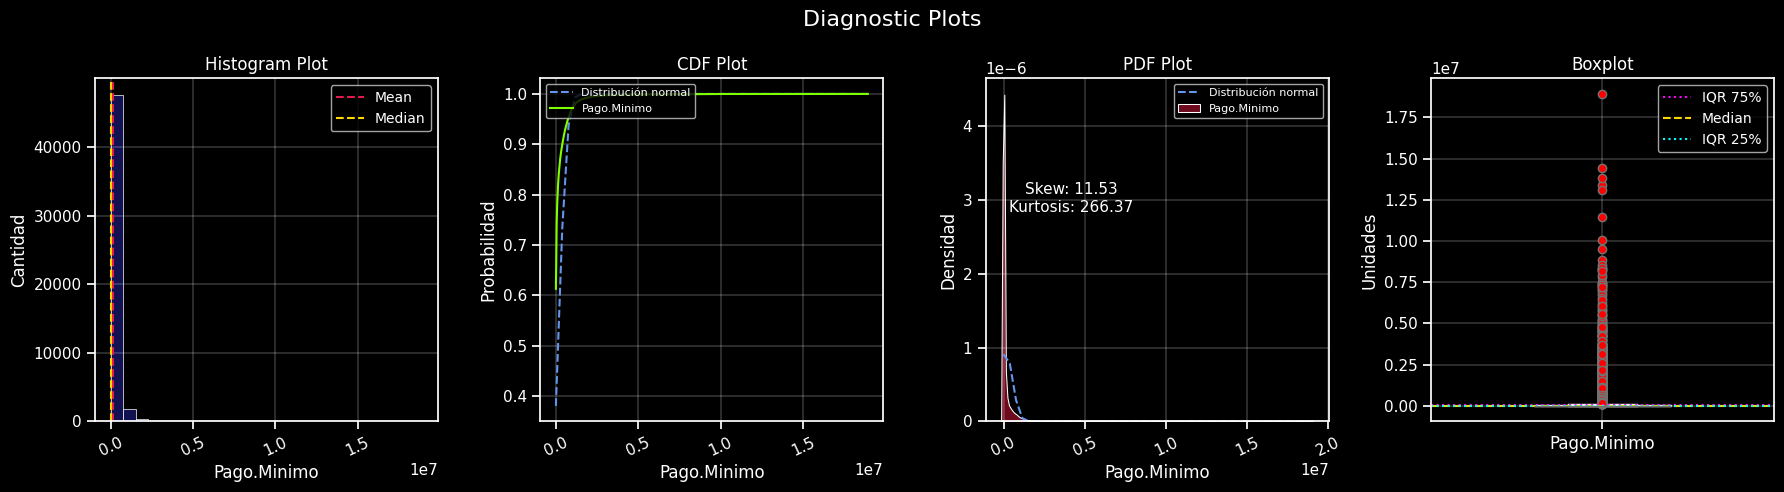

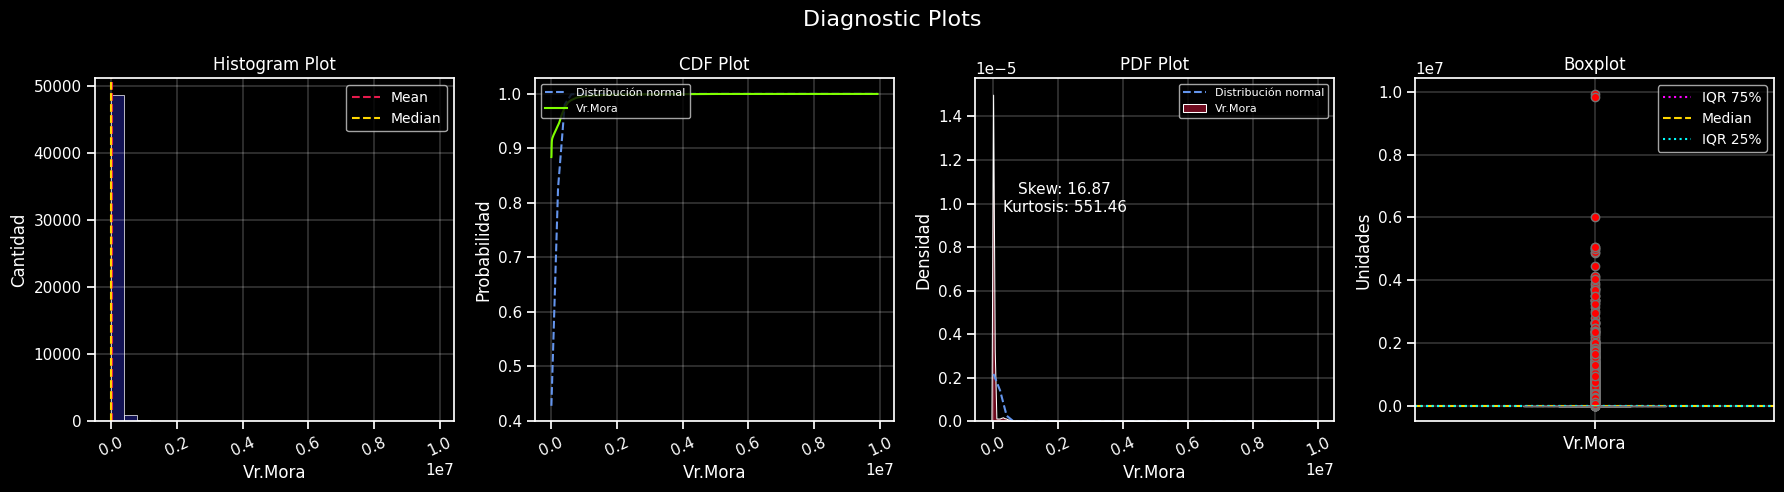

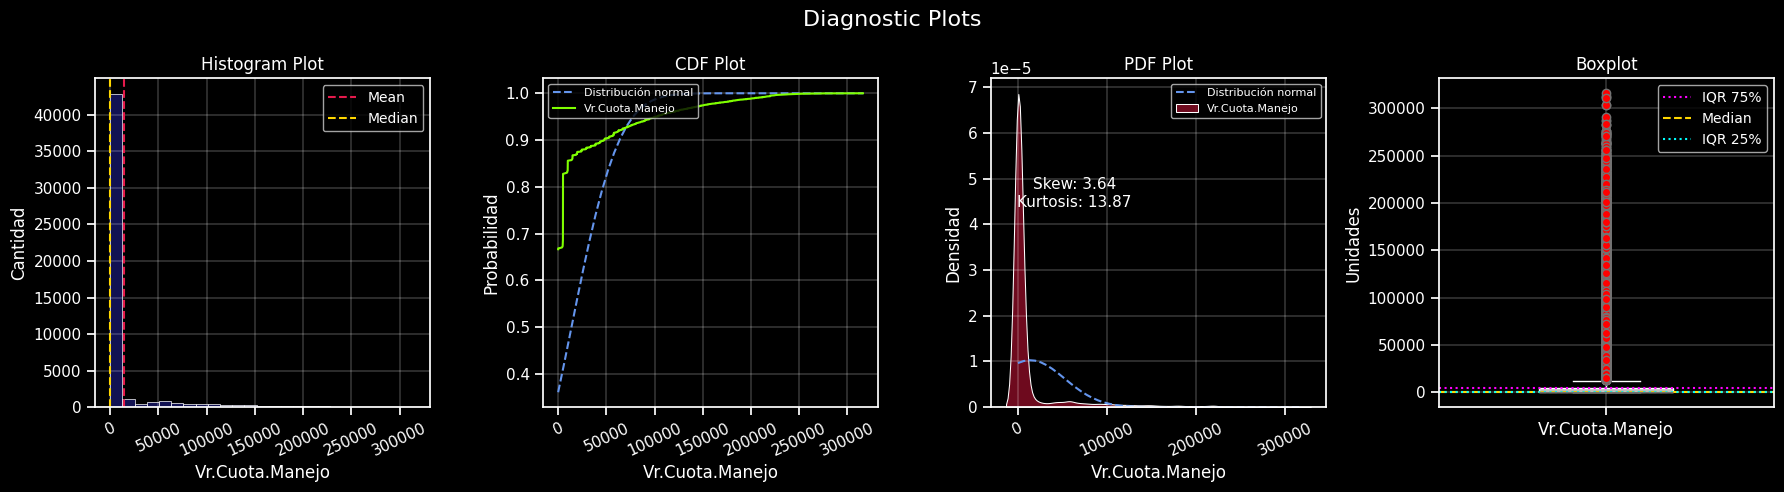

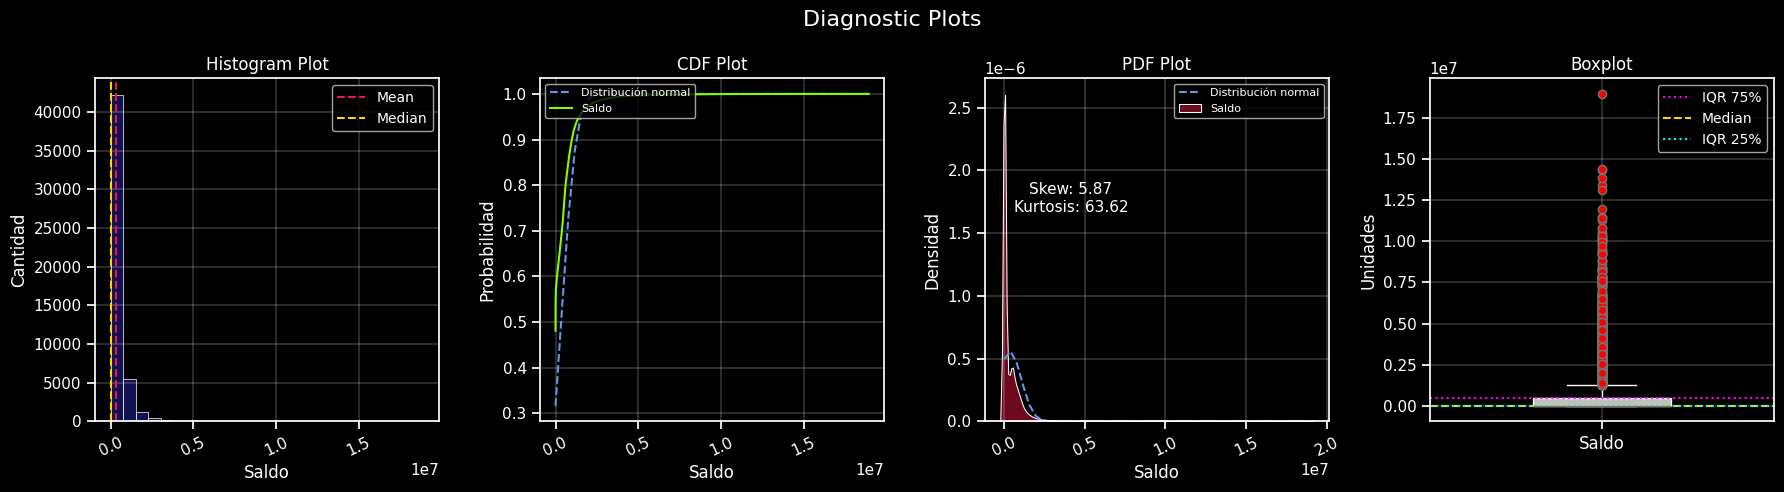

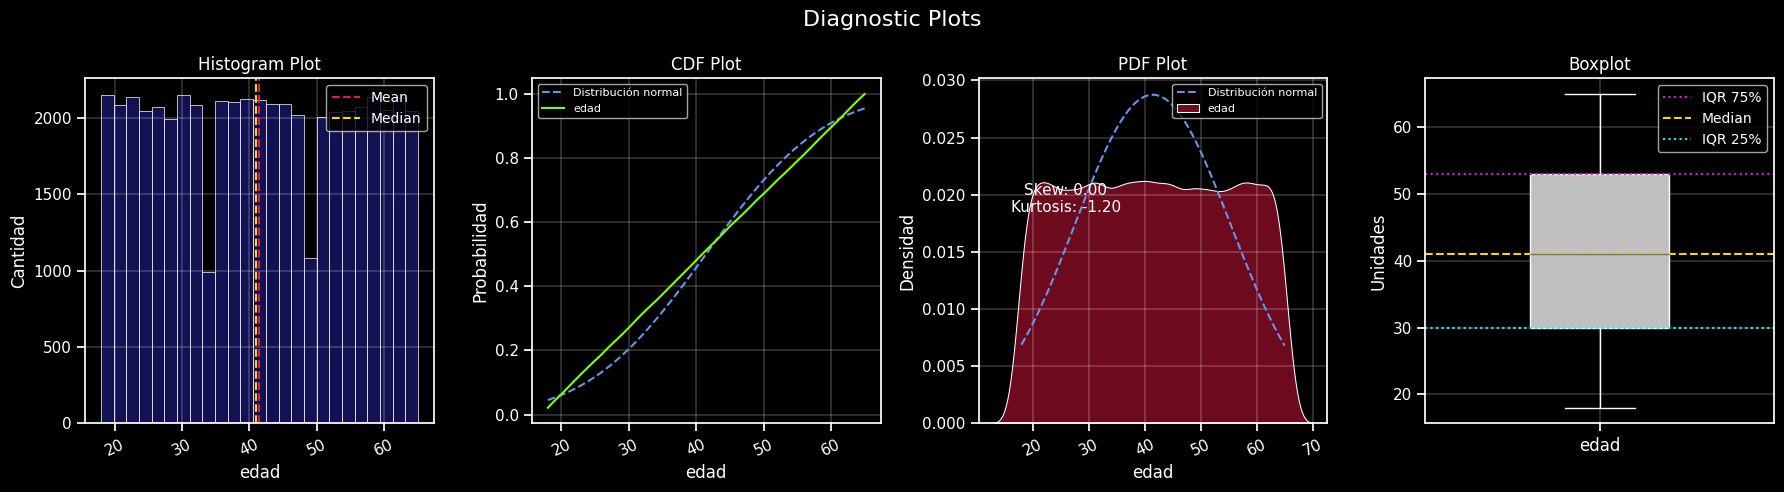

In [102]:
vars_ok = [c for c in continuous if c in df4.columns and c not in ['Target','id']]
diagnostic_plots(
    data=df4.loc[:, ~df4.columns.isin(['Target','id'])],
    variables=vars_ok
)

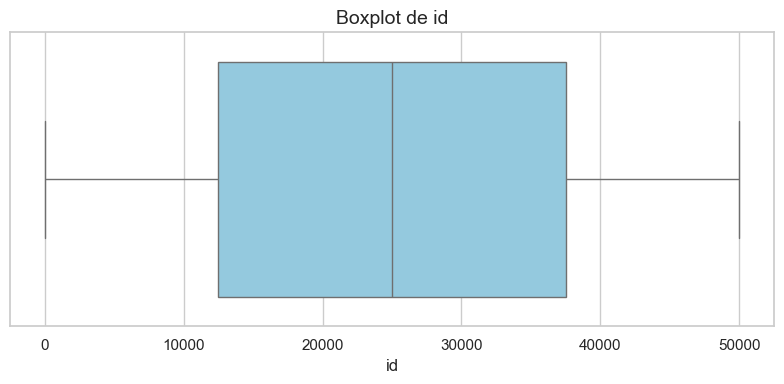

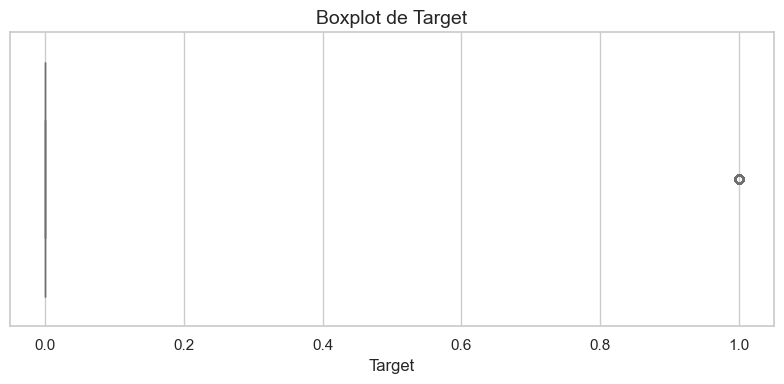

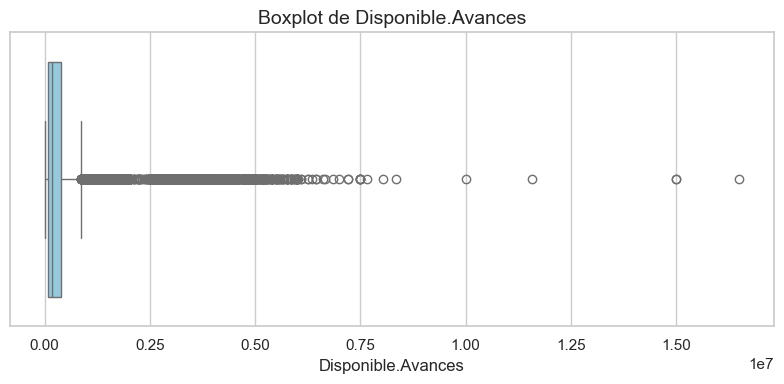

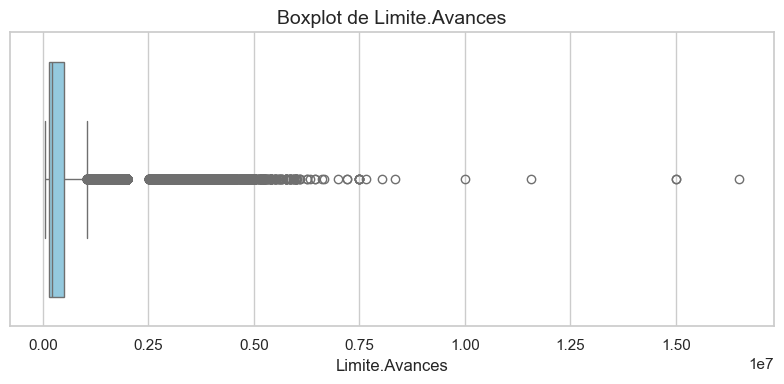

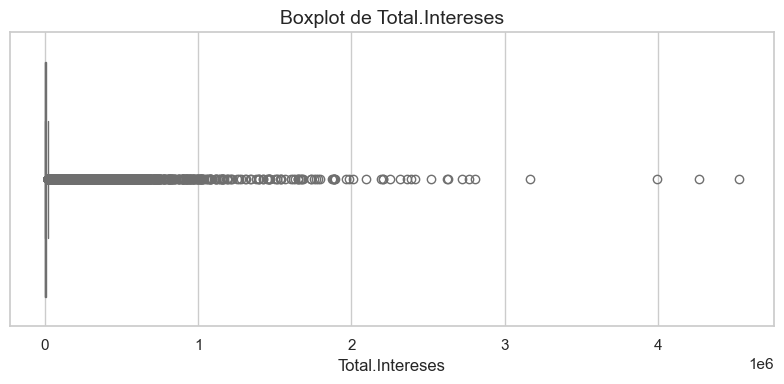

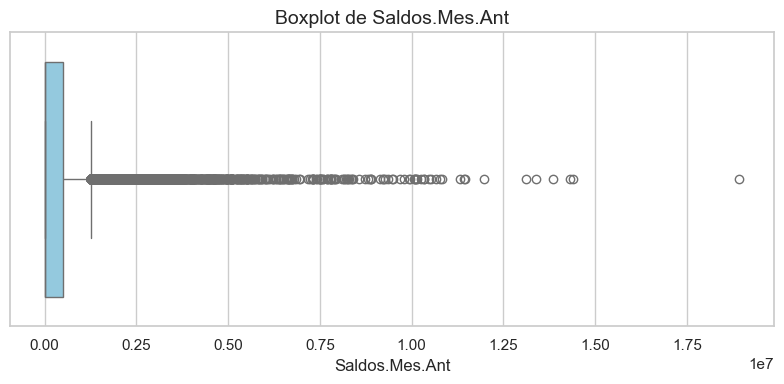

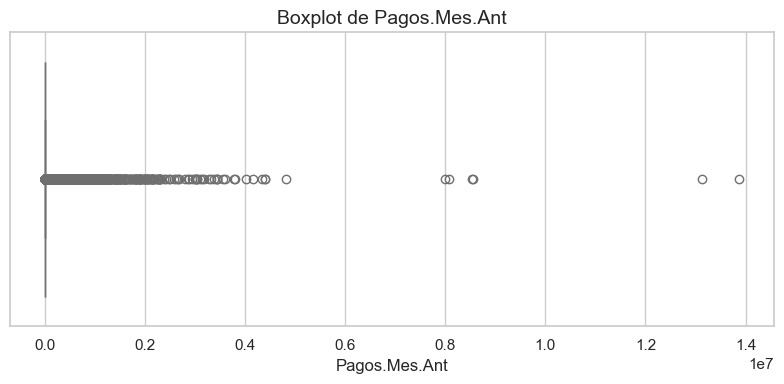

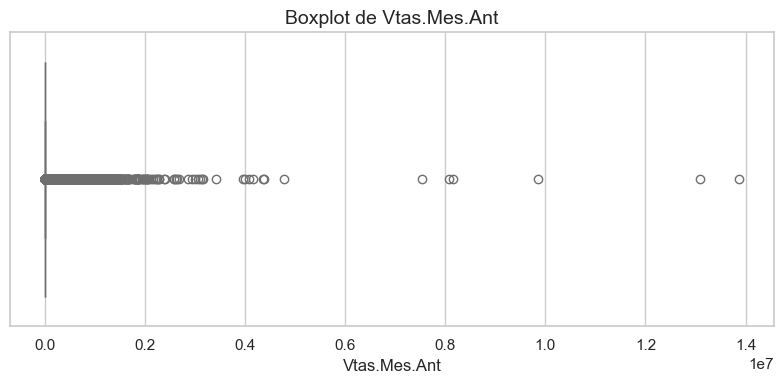

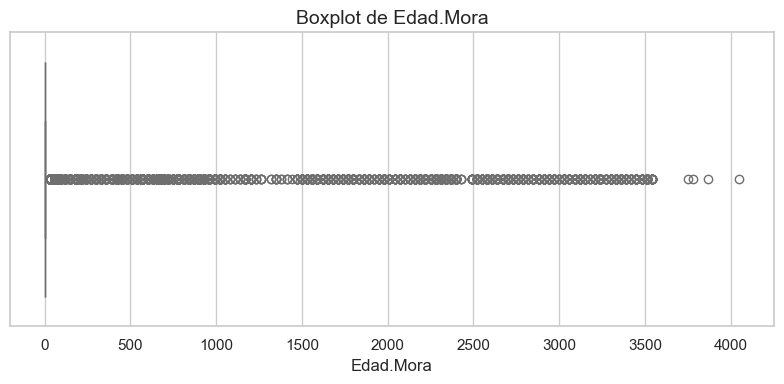

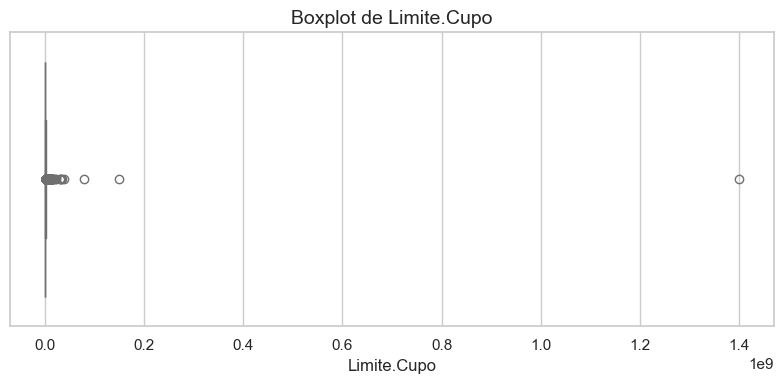

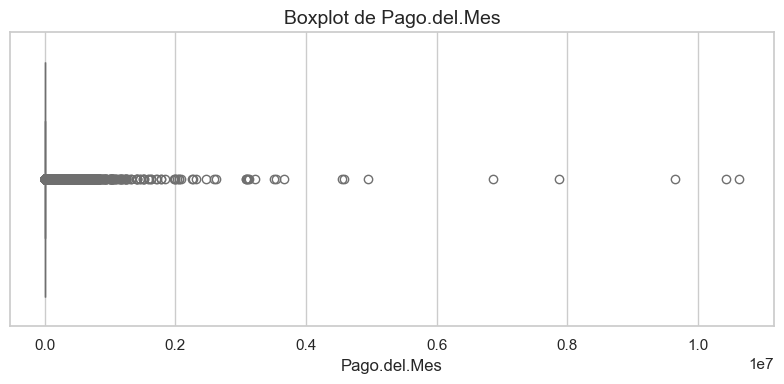

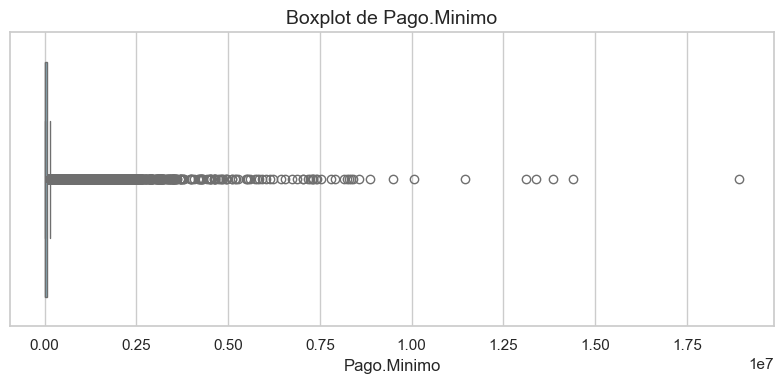

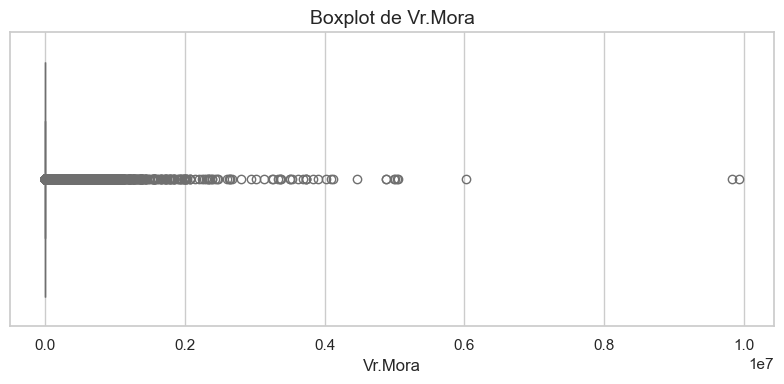

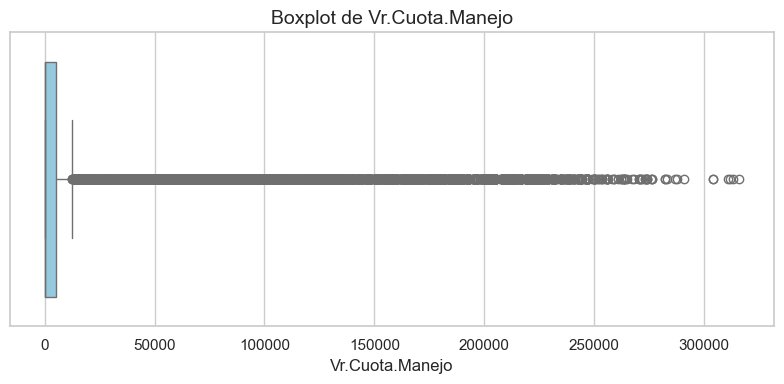

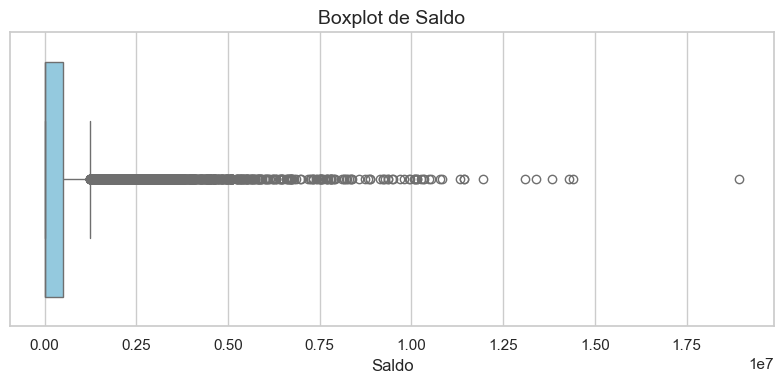

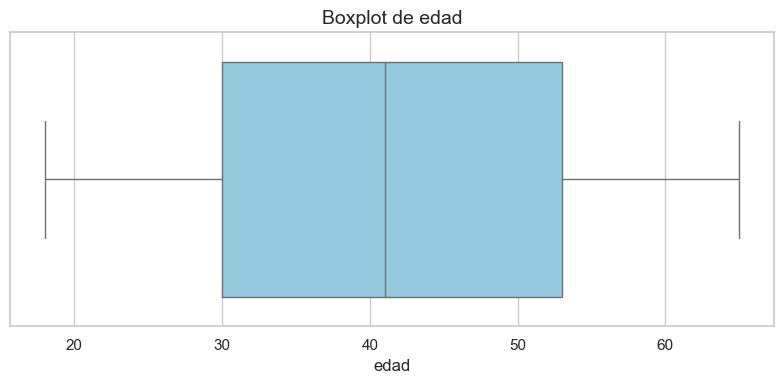

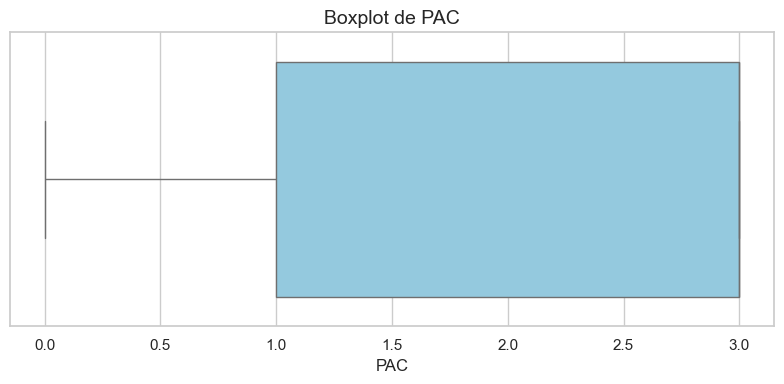

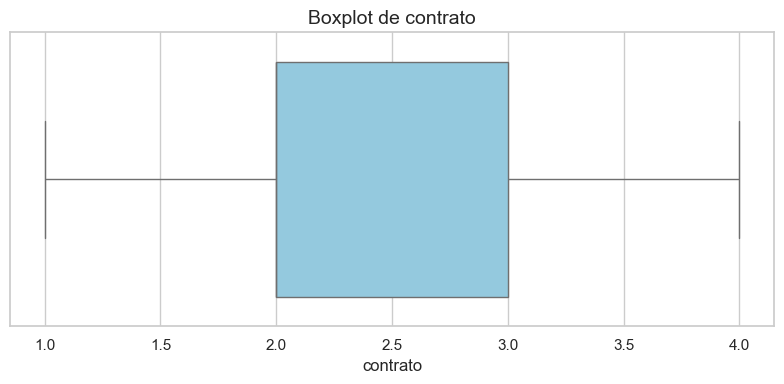

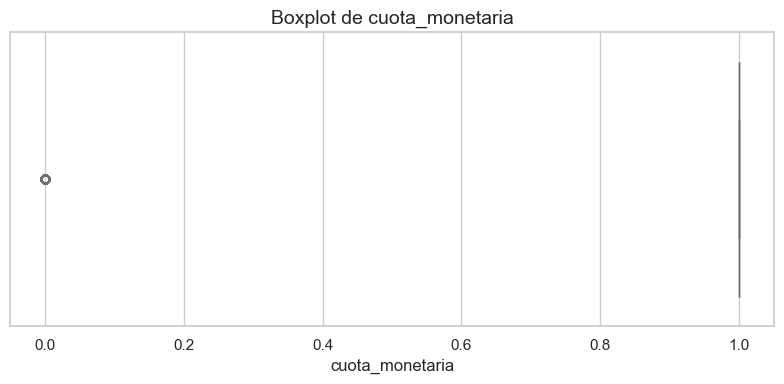

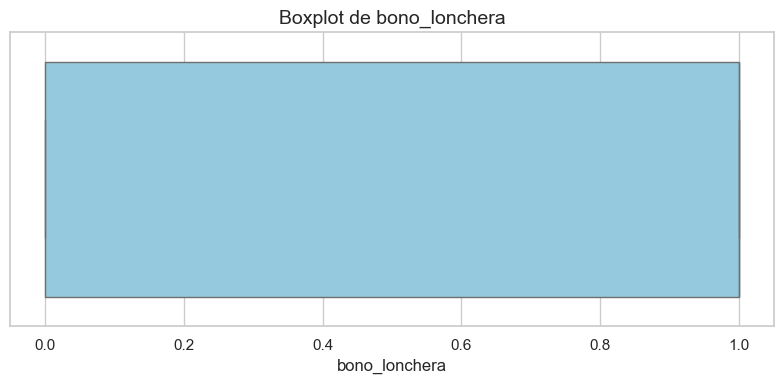

In [103]:
# Seleccionar las columnas numéricas
numeric_cols = df4.select_dtypes(include=["int64","float64"]).columns.tolist()

# Convertir a un DataFrame de Pandas
df_pandas = df4[numeric_cols]

# Configuración general del estilo
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})  # Evitar advertencias por muchas gráficas

# Iterar sobre cada columna y generar un boxplot individual
for column in df_pandas.columns:
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    sns.boxplot(data=df_pandas, x=column, color="skyblue")
    
    # Título y etiquetas
    plt.title(f"Boxplot de {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()

In [ ]:
df4